In [116]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy.stats import iqr
import seaborn
from matplotlib.pyplot import show 

In [117]:
data = pd.read_csv("/Users/rakip/Desktop/Course_Work_MS/r1z1.csv")

In [83]:
data

,X
0,117.5
1,121.5
2,120.0
3,115.5
4,124.5
5,122.2
6,122.0
7,121.0
8,127.0
9,126.0


In [84]:
data_min = data.min()  # минимум
data_max = data.max()  #  максимум
range_data = data_max - data_min
print("Min =", data_min,"\nMax =", data_max,"\nRange =", range_data)  #  размах

Min = X    115.0
dtype: float64 
Max = X    127.0
dtype: float64 
Range = X    12.0
dtype: float64


In [85]:
mean = data.sum()/len(data)  #  мат ожидание
mean
# Или

X    121.079121
dtype: float64

In [86]:
data.mean()  #  мат ожидание

X    121.079121
dtype: float64

In [87]:
print(data.std()) #стандартоне отклонение
#  или
std = despersion ** (1/2)
print(std)

X    2.840404
dtype: float64
X    2.824754
dtype: float64


In [88]:
print(data.var())  #  дисперсия несмещённая
#  или
despersion = sum([(xi - mean) ** 2 for xi in data['X']]) / len(data)  # смещённая
print(despersion)

X    8.067893
dtype: float64
X    7.979234
dtype: float64


In [89]:
data.skew() #коэфициент ассиметрии
#  или
# koef = sum([xi - mean) ** 3 for xi in data['X']])/ (len(data) * (std ** 3)

X    0.101867
dtype: float64

In [90]:
print(data.median())  #  медиана

sorted_data = data['X'].sort_values()
data_sorted = pd.Series.tolist(sorted_data)

if len(data_sorted) % 2 != 0:      
   median = (len(data_sorted))//2 
   median = data_sorted[median]
else: 
   median = len(data_sorted)//2 
   median = (data_sorted[median] + data_sorted[median-1])/2
print("Median = ", median)

X    121.0
dtype: float64
Median =  121.0


In [103]:
if len(data_sorted) % 2 != 0:      #интерквартильная широта 
    Q1 = (len(data_sorted))//4
    Q1 = data_sorted[Q1]
    Q3 = int((len(data_sorted))*0.75)
    Q3 = data_sorted[Q3]
else: 
    Q1 = int(len(data_sorted)*0.75)
    Q1 = (data_sorted[Q1] + data_sorted[Q1-1])/2
    Q3 = len(data_sorted)//(4)
    Q3 = (data_sorted[Q3] + data_sorted[Q3-1])/2
print("Q1/4 = ", Q1)
print("Q3/4 = ", Q3)
print("IQR = ", Q3-Q1)

Q1/4 =  119.0
Q3/4 =  123.0
IQR =  4.0


In [118]:
iqr = np.subtract(*np.percentile(data, [75, 25])) #  через numpy
iqr

4.0

the num of bins  X    7.0
dtype: float64


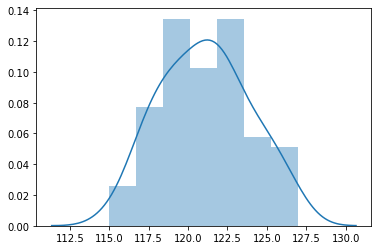

In [128]:
af = seaborn.distplot(data, kde=True)  # гистограмма выборки 
# (n^(1/3)*range/(2*iqr) - Freedman–Diaconis rule
inter = (data.count()**(1/3)*range_data)/(2*iqr)
print("the num of bins ", round(inter))

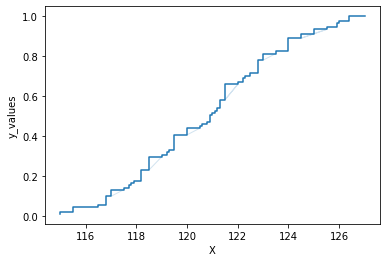

In [130]:
from statsmodels.distributions.empirical_distribution import ECDF  #  эмпирическая функция распределения

file = ECDF(data['X'])
data['y_values'] = data['X'].apply(file)
sns.lineplot(data['X'],data['y_values'], drawstyle='steps-pre')
show()

In [47]:
from scipy import stats  #мода
stats.mode(data['X'])

ModeResult(mode=array([120.]), count=array([7]))

In [75]:
data.describe()

,X
count,91.000000
mean,121.079121
std,2.840404
min,115.000000
25%,119.000000
50%,121.000000
75%,123.000000
max,127.000000
